# Predicing Sin Wave



https://github.com/sasayabaku/Machine-Learning-notebook-memo/blob/master/Example_RNN/SineWave_Prediction.ipynb

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)


def add_noise(f, T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return f(x, T=T) + noise


data = add_noise(sin)

201


In [ ]:
def make_dataset(data, length=40):
    train, label = [], []
    
    for i in range(len(data) - length):
        train.append(data[i:i + length])
        label.append(data[i + length])
    
    train = np.array(train).reshape(len(train), length, 1)
    label = np.array(label).reshape(len(label), 1)
    
    return train, label


train, label = make_dataset(data)

In [ ]:
model = Sequential()
model.add(LSTM(300, batch_input_shape=(None, 40, 1)))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss='mean_squared_error', optimizer=Adam())

In [ ]:
history = model.fit(
    train, label,
    batch_size=100,
    epochs=300,
    validation_split=0.2,
    callbacks=[]
)

Epoch 1/300
2/2 [==============================] - 1s 285ms/step - loss: 0.4826 - val_loss: 0.1970
Epoch 2/300
2/2 [==============================] - 0s 92ms/step - loss: 0.2044 - val_loss: 0.0683
Epoch 3/300
2/2 [==============================] - 0s 91ms/step - loss: 0.1054 - val_loss: 0.0352
Epoch 4/300
2/2 [==============================] - 0s 92ms/step - loss: 0.0469 - val_loss: 0.0157
Epoch 5/300
2/2 [==============================] - 0s 94ms/step - loss: 0.0289 - val_loss: 0.0144
Epoch 6/300
2/2 [==============================] - 0s 90ms/step - loss: 0.0178 - val_loss: 0.0040
Epoch 7/300
2/2 [==============================] - 0s 93ms/step - loss: 0.0044 - val_loss: 0.0012
Epoch 8/300
2/2 [==============================] - 0s 88ms/step - loss: 0.0063 - val_loss: 0.0037
Epoch 9/300
2/2 [==============================] - 0s 92ms/step - loss: 0.0049 - val_loss: 0.0033
Epoch 10/300
2/2 [==============================] - 0s 93ms/step - loss: 0.0046 - val_loss: 0.0021
Epoch 11/300
2/2 [

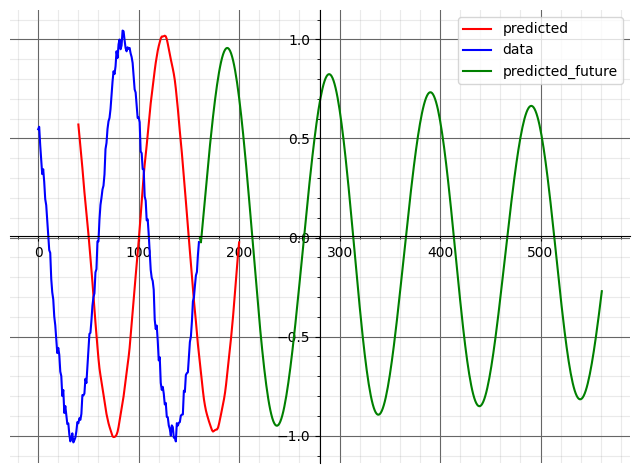

In [ ]:
# predicted = model.predict(train)

# predicted_future = np.empty((1,))
# latest = train[160].T
# for _ in range(400):
#     temp = np.reshape(latest, (1, 40, 1))
#     temp_predict = model.predict(temp)
#     latest = np.delete(temp, 0)
#     latest = np.append(latest, temp_predict)
#     predicted_future = np.append(predicted_future, temp_predict)

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111)
ax.plot(range(40, len(predicted) + 40), predicted, color='r', label='predicted')
ax.plot(range(0, len(label)), label, color='b', label='data')
ax.plot(range(len(train), len(predicted_future) + len(train)), predicted_future, color="g", label="predicted_future")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
ax.spines['bottom'].set_position('center')
ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend()
plt.show()